In [1]:
import pandas as pd
import numpy as np

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств


In [2]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
data.shape

(30000, 25)

### Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

### а)

Проверим гипотезу a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки.

Проверяется гипотеза H0 о равенстве медианных значений против двусторонней альтернативы.

Text(0.5,1,'default = 1')

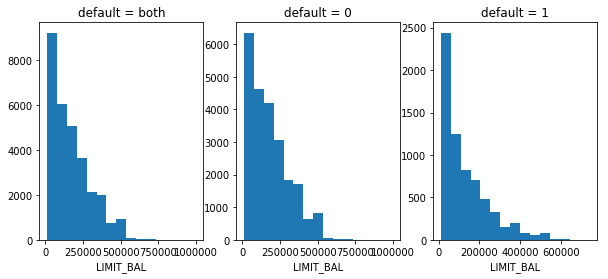

In [44]:
plt.figure(figsize = (10,4))
plt.subplot(131)
plt.hist(data.LIMIT_BAL, bins = 15)
plt.xlabel('LIMIT_BAL')
plt.title('default = both')
plt.subplot(132)
plt.hist(data[data.default == 0].LIMIT_BAL, bins = 15)
plt.xlabel('LIMIT_BAL')
plt.title('default = 0')
plt.subplot(133)
plt.hist(data[data.default == 1].LIMIT_BAL, bins = 15)
plt.xlabel('LIMIT_BAL')
plt.title('default = 1')

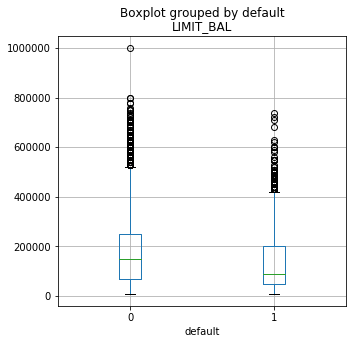

In [45]:
data.boxplot(column="LIMIT_BAL", by="default", figsize = (5,5))

Распределения по группам default похожи друг на друга, но есть разница по размерам лимита. Для группы default = 0 размер кредитного лимита выше. Докажем, что различие между этими группами действительно есть, с помощью бутстрепа:

In [46]:
limit_bal_0 = data[data.default == 0].LIMIT_BAL.values
limit_bal_1 = data[data.default == 1].LIMIT_BAL.values

In [47]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [48]:
np.random.seed(0)

limit_bal_0_median_scores = list(map(np.median, get_bootstrap_samples(limit_bal_0, 1000)))
limit_bal_1_median_scores = list(map(np.median, get_bootstrap_samples(limit_bal_1, 1000)))

print("95% confidence interval for the default = 0 credit limit:",  stat_intervals(limit_bal_0_median_scores, 0.05))
print("95% confidence interval for the default = 1 credit limit:",  stat_intervals(limit_bal_1_median_scores, 0.05))
print("difference between medians:", np.median(limit_bal_0) - np.median(limit_bal_1))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(limit_bal_0_median_scores, limit_bal_1_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

('95% confidence interval for the default = 0 credit limit:', array([150000., 150000.]))
('95% confidence interval for the default = 1 credit limit:', array([80000., 90000.]))
('difference between medians:', 60000.0)
('95% confidence interval for the difference between medians', array([60000., 70000.]))


#### Вывод: таким образом, кредитный лимит для клиентов с индикатором невозврата денежных средств = 0 больше, чем у клиентов с default = 1.

### b) 
Проверим гипотезу b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Использовать критерий Манна-Уитни нельзя, т.к в выборках много повторяющихся значений, поэтому используем двухвыборочный перестановочный критерий для независимых выборок.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [125]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n)))
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean()
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / float(len(zero_distr))
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / float(len(zero_distr))

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / float(len(zero_distr))

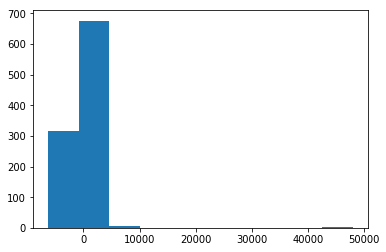

In [126]:
plt.hist(permutation_zero_dist_ind(limit_bal_0, limit_bal_1, max_combinations = 1000))
plt.show()

In [127]:
print("p-value: %f" % permutation_test(limit_bal_0, limit_bal_1, max_permutations = 1000))

p-value: 0.001000


### Задание 2

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [128]:
sex_0 = data[data.default == 0].SEX.values
sex_1 = data[data.default == 1].SEX.values

Text(0.5,1,'default = 1')

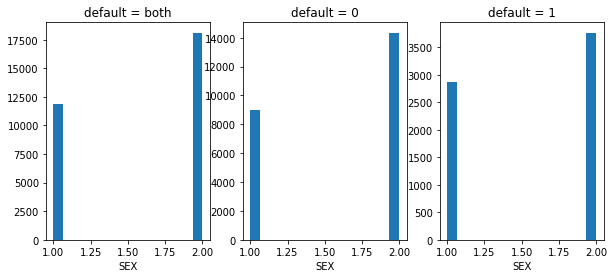

In [129]:
plt.figure(figsize = (10,4))
plt.subplot(131)
plt.hist(data.SEX, bins = 15)
plt.xlabel('SEX')
plt.title('default = both')
plt.subplot(132)
plt.hist(sex_0, bins = 15)
plt.xlabel('SEX')
plt.title('default = 0')
plt.subplot(133)
plt.hist(sex_1, bins = 15)
plt.xlabel('SEX')
plt.title('default = 1')

Интервальные оценки долей:

In [130]:
from statsmodels.stats.proportion import proportion_confint
conf_interval_sex_0 = proportion_confint(sum((sex_0 == 1)), 
                                            len(sex_0),
                                            method = 'wilson')
conf_interval_sex_1 = proportion_confint(sum((sex_1 == 1)), 
                                            len(sex_1),
                                            method = 'wilson')
print('interval for sex_0 [%f, %f]' % conf_interval_sex_0)
print('interval for sex_1 [%f, %f]' % conf_interval_sex_1)

interval for sex_0 [0.379627, 0.392110]
interval for sex_1 [0.421062, 0.444898]


Интервалы не пересекаются, значит уже можно сделать вывод о том, что мужчин больше в группе default = 1.

In [131]:
import scipy
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = sum((sex_0 == 1)) / float(len(sample1))
    p2 = sum((sex_1 == 1)) / float(len(sample2))
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [132]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(sex_0, sex_1))

confidence interval: [-0.060548, -0.033635]


#### Вывод: в группе default = 1 мужчин больше, хотя практически эта разница незначительна

### Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборот, не отдаст долг?

In [133]:
edu_0 = data[data.default == 0].EDUCATION.values
edu_1 = data[data.default == 1].EDUCATION.values

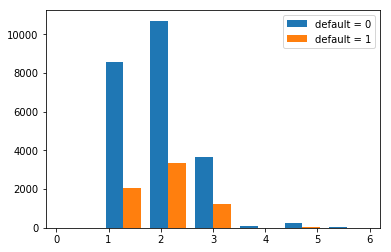

In [134]:
plt.hist([edu_0, edu_1], 7, label = ["default = 0", "default = 1"])
plt.legend()

Выборки не масштабированы, поэтому сложно сделать вывод о том, влияет ли образование на возврат долга.

Построим таблицу сопряженности:

In [135]:
edu_contingency_table = pd.pivot_table(data, values = ["LIMIT_BAL"], index = ["EDUCATION"], columns = ["default"], fill_value = 0, aggfunc = 'count')
edu_contingency_table

LIMIT_BAL      
default           0     1
EDUCATION                
0                14     0
1              8549  2036
2             10700  3330
3              3680  1237
4               116     7
5               262    18
6                43     8

В двух группах default = 0, default = 1 разное колличество людей, следовательно таблица не масштабирована. Для интерпретируемости необходимо каждый столбец поделить на количество людей в соответствующей группе.

In [136]:
edu_contingency_table['scaled_0'] = edu_contingency_table.LIMIT_BAL[0].apply(lambda x: float(x)/data[data.default == 0].shape[0])
edu_contingency_table['scaled_1'] = edu_contingency_table.LIMIT_BAL[1]/data[data.default == 1].shape[0]

In [137]:
edu_contingency_table

LIMIT_BAL        scaled_0  scaled_1
default           0     1                    
EDUCATION                                    
0                14     0  0.000599  0.000000
1              8549  2036  0.365905  0.306811
2             10700  3330  0.457970  0.501808
3              3680  1237  0.157507  0.186407
4               116     7  0.004965  0.001055
5               262    18  0.011214  0.002712
6                43     8  0.001840  0.001206

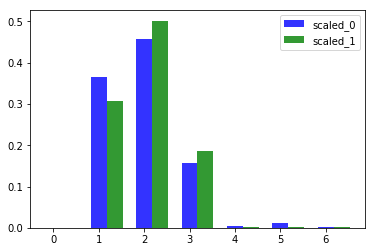

In [138]:
#Построим barplot 
n_groups = 7
y1 = edu_contingency_table['scaled_0']
y2 = edu_contingency_table['scaled_1']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y1, bar_width,
alpha=opacity,
color='b',
label='scaled_0')

rects2 = plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='g',
label='scaled_1')
plt.legend()

Посчитаем коэффициент корреляции V-Крамера и найдем для него уровень значимости с помощью критерия Хи-квадрат. Условия применимости этого критерия выполняются, так как больше 20% значений таблциы сопряженности больше 5 и длина выборки больше 40.

In [139]:
def v_Cramer_correlation(table):
    chi_stat = stats.chi2_contingency(table)[0]
    k_min = np.min(table.shape)
    n = np.sum(np.sum(table))
    return np.sqrt(chi_stat/(n*(k_min-1)))

In [140]:
from scipy import stats
print("V-Cramer statistic is: %.4f" % v_Cramer_correlation(edu_contingency_table))
print("p-value:", stats.chi2_contingency(edu_contingency_table)[1])

V-Cramer statistic is: 0.0426
('p-value:', 1.932973153520186e-25)


#### Вывод: таким образом, можно сделать вывод, что признаки кореллируют, но незначительно, так как статистика V-Крамера мала. Лучше всегда кредит возвращают клиенты с докторской степенью, хуже всего - выпускники школы.

### Задание 3

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Поскольку оба признака категориальные (бинарный default можем считать категориальным), можно использовать коэффициент V-Крамера для выявления зависимости дефолта от семейного положения.

In [141]:
marriage_contingency_table = pd.pivot_table(data, values = ["LIMIT_BAL"], index = ["MARRIAGE"], columns = ["default"], fill_value = 0, aggfunc = 'count')
marriage_contingency_table

LIMIT_BAL      
default          0     1
MARRIAGE                
0               49     5
1            10453  3206
2            12623  3341
3              239    84

Посчитаем коэффициент корреляции V-Крамера и найдем для него уровень значимости с помощью критерия Хи-квадрат. Условия применимости этого критерия выполняются, так как больше 20% значений таблциы сопряженности больше 5 и длина выборки больше 40.

In [142]:
print("V-Cramer statistic is: %.4f" % v_Cramer_correlation(marriage_contingency_table))
print("p-value:", stats.chi2_contingency(marriage_contingency_table)[1])

V-Cramer statistic is: 0.0345
('p-value:', 8.825862457577375e-08)


#### Вывод: таким образом, можно сделать вывод, что признаки кореллируют, но незначительно, так как статистика V-Крамера мала.

### Задание 4

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

#### a) гипотеза о равенстве медианных значений возрастов людей

In [143]:
age_0 = data[data.default == 0].AGE.values
age_1 = data[data.default == 1].AGE.values

Text(0.5,1,'default = 1')

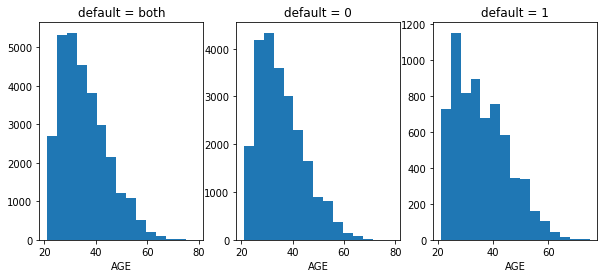

In [144]:
plt.figure(figsize = (10,4))
plt.subplot(131)
plt.hist(data.AGE, bins = 15)
plt.xlabel('AGE')
plt.title('default = both')
plt.subplot(132)
plt.hist(age_0, bins = 15)
plt.xlabel('AGE')
plt.title('default = 0')
plt.subplot(133)
plt.hist(age_1, bins = 15)
plt.xlabel('AGE')
plt.title('default = 1')

Найдем интервальные оценки с помощью бутстрепа:

In [145]:
np.random.seed(0)

age_0_median_scores = list(map(np.median, get_bootstrap_samples(age_0, 1000)))
age_1_median_scores = list(map(np.median, get_bootstrap_samples(age_1, 1000)))

print("95% confidence interval for the default = 0 age:",  stat_intervals(age_0_median_scores, 0.05))
print("95% confidence interval for the default = 1 age:",  stat_intervals(age_1_median_scores, 0.05))
print("difference between medians:", np.median(age_0) - np.median(age_1))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(age_0_median_scores, age_1_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

('95% confidence interval for the default = 0 age:', array([34., 34.]))
('95% confidence interval for the default = 1 age:', array([34., 35.]))
('difference between medians:', 0.0)
('95% confidence interval for the difference between medians', array([-1.,  0.]))


#### Вывод: гипотеза о медианном равенстве не отвергается, так как доверительный интервал содержит 0.

#### a) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних

Используем перестановочный критерий для независимых выборок:

In [146]:
print("p-value: %f" % permutation_test(age_0, age_1, max_permutations = 1000))

p-value: 0.014000


#### Вывод: гипотеза о равенстве распределений не отвергается на уровне значимости 0.05.

In [34]:
## Заключение
# Мы определили, что
# 
# * размер кредитного лимита для людей не допускающих просрочки значимо выше.
# * гендерный состав людей вернувших и просрочивших долг значимо различается.
# * доля женщин в группе не допускающих просрочку выше.
# * образование не сильно, но все-таки значимо влияет на вероятность возврата долга.
# * можно утверждать, что люди с лучшим образованием чаще возвращают долг.
#   (хотя здесь статистику портят группы other, n/a и basic).
# * незамужние люди и люди не желающие раскрывать свой семейный статус чаще возвращают долг.
#   Сомнительное утверждение, требующее дополнительной проверки, тем более, что статистика V-Крамера очень мала.
# * возрастной состав в группах вернувших и просрочивших долг примерно одинаков.
# 
# На мой взгляд полученные результаты совпадают с очень частой политикой выдачи кредитов банками.
# С другой стороны стоит отметить, что эти признаки скорее выглядят вспомогательными и первоочередными критериями скорее
# являются доход и трудоустроенность клиента.